In [13]:
import xarray as xr
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from influenza_USA.NC_forecasts.TDPF import transmission_rate_function

In [14]:
samples_xr = xr.open_dataset("exclude-2024-2025_SAMPLES_2025-02-16.nc")

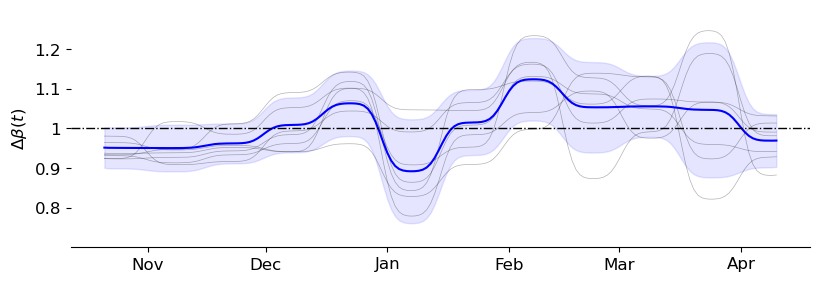

In [30]:
fig,ax=plt.subplots(figsize=(8.3, 11.7/4))
### get transmission rate function
f = transmission_rate_function(sigma=2.5)
x = pd.date_range(start=datetime(2020,10,21), end=datetime(2021,4,10), freq='D').tolist()
### compute modifier tranjectory of every season and plot
for i, season in enumerate(samples_xr.coords['season']):
    y = []
    for d in x:
        y.append(f(d, {}, 1, samples_xr['delta_beta_temporal'].median(dim=['iteration', 'chain']).sel(season=season).values))
    ax.plot(x, np.squeeze(np.array(y)), color='black', linewidth=0.5, alpha=0.3)
### visualise hyperdistribution
ll=[]
y=[]
ul=[]
for d in x:
    ll.append(f(d, {}, 1, samples_xr['delta_beta_temporal_mu'].median(dim=['iteration', 'chain']).values - samples_xr['delta_beta_temporal_sigma'].median(dim=['iteration', 'chain']).values))
    y.append(f(d, {}, 1, samples_xr['delta_beta_temporal_mu'].median(dim=['iteration', 'chain']).values))
    ul.append(f(d, {}, 1, samples_xr['delta_beta_temporal_mu'].median(dim=['iteration', 'chain']).values + samples_xr['delta_beta_temporal_sigma'].median(dim=['iteration', 'chain']).values))
ax.plot(x, np.squeeze(np.array(y)), color='blue', alpha=1)
ax.fill_between(x, np.squeeze(np.array(ll)), np.squeeze(np.array(ul)), color='blue', alpha=0.1)
ax.axhline(y=1, color='black', linewidth=1, linestyle='-.')
## axis formatting
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
ax.set_yticks([0.8, 0.9, 1, 1.1, 1.2])
ax.set_yticklabels([0.8, 0.9, 1, 1.1, 1.2])
ax.set_ylabel(r'$\Delta \beta(t)$', fontsize=12)
ax.set_ylim([0.7, 1.3])
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.tight_layout()
plt.savefig('modifiers_hyperdistribution.pdf')
plt.show()
plt.close()